# Universidad Autónoma de Nuevo León
## Facultad de Ciencias Fisico Matemáticas
### Maestría en Ciencia de Datos
#### Alumno: Francisco D. Treviño B.

### Tarea 1 (10 puntos). Creación y operaciones básicas con PySpark
### 1. Instalar en un entorno local o ejecutar Spark en algún servidor en línea (como Google Colab)
### 2. Elegir un conjunto de datos para trabajar durante el tetramestre, definirlo y explicar por qué se elige
### 3. Cargar el conjunto de datos mediante PySpark
### 4. Usar PySpark para filtrar datos, generar estadísticas descriptivas básicas y realizar algunas operaciones aritméticas entre registros y columnas
### 5. Crear un repositorio público para el curso y publicar en un cuaderno esta primera tarea

# Instalación de Spark

## Se utilizó Docker para la instalación Spark usando una imagen, con el siguiente comando en Windows, según referencia en https://hub.docker.com/_/spark:
### docker pull spark


## Para correr Spark en Docker en modo interactivo se corre el siguiente comando:
### docker run -it spark:python3 /opt/spark/bin/pyspark

## Nota: no se utilizaron las siguientes instrucciones para instalar Spark.
#### !sudo apt update
#### !apt-get install openjdk-8-jdk-headless -qq > /dev/null
#### !wget -q https://archive.apache.org/dist/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz
#### !tar xf spark-3.72.1-bin-hadoop3.2.tgz

In [1]:
!pip install -q findspark


[notice] A new release of pip available: 22.2.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install pyspark

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.2.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install py4j

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.2.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import os
import sys

import findspark
findspark.init()
findspark.find()

import pyspark

from pyspark.sql import DataFrame, SparkSession
from typing import List
import pyspark.sql.types as T
import pyspark.sql.functions as F

spark= SparkSession.builder.appName("Mi primera").getOrCreate()

In [5]:
spark

In [6]:
### Lectura de datos

In [7]:
import requests
path = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"
response = requests.get(path)
url_content = response.content

csv_file_name = 'owid-covid-data.csv'
csv_file = open(csv_file_name, 'wb')

csv_file.write(url_content)
csv_file.close()

In [8]:
df = spark.read.csv(csv_file_name, header=True, inferSchema=True)

### Dataframes de PySpark

In [9]:
df.printSchema()

root
 |-- iso_code: string (nullable = true)
 |-- continent: string (nullable = true)
 |-- location: string (nullable = true)
 |-- date: date (nullable = true)
 |-- total_cases: integer (nullable = true)
 |-- new_cases: integer (nullable = true)
 |-- new_cases_smoothed: double (nullable = true)
 |-- total_deaths: integer (nullable = true)
 |-- new_deaths: integer (nullable = true)
 |-- new_deaths_smoothed: double (nullable = true)
 |-- total_cases_per_million: double (nullable = true)
 |-- new_cases_per_million: double (nullable = true)
 |-- new_cases_smoothed_per_million: double (nullable = true)
 |-- total_deaths_per_million: double (nullable = true)
 |-- new_deaths_per_million: double (nullable = true)
 |-- new_deaths_smoothed_per_million: double (nullable = true)
 |-- reproduction_rate: double (nullable = true)
 |-- icu_patients: integer (nullable = true)
 |-- icu_patients_per_million: double (nullable = true)
 |-- hosp_patients: integer (nullable = true)
 |-- hosp_patients_per_mil

In [10]:
# Converting a date column
df.select(F.to_date(df.date).alias('date'))

DataFrame[date: date]

In [11]:
# Summary stats
df.describe().show()

+-------+--------+-------------+-----------+-------------------+-----------------+------------------+-----------------+------------------+-------------------+-----------------------+---------------------+------------------------------+------------------------+----------------------+-------------------------------+------------------+-----------------+------------------------+------------------+-------------------------+---------------------+---------------------------------+----------------------+----------------------------------+-------------------+------------------+------------------------+----------------------+------------------+-------------------------------+-------------------+-----------------+-------------+-------------------+--------------------+-----------------------+--------------------+-----------------+-------------------------+------------------------------+-----------------------------+-----------------------------------+--------------------------+--------------------

In [12]:
# DataFrame Filtering
df.filter(df.location.isin("United States", "Mexico")).orderBy(F.desc("date")).show()

+--------+-------------+-------------+----------+-----------+---------+------------------+------------+----------+-------------------+-----------------------+---------------------+------------------------------+------------------------+----------------------+-------------------------------+-----------------+------------+------------------------+-------------+-------------------------+---------------------+---------------------------------+----------------------+----------------------------------+-----------+---------+------------------------+----------------------+------------------+-------------------------------+-------------+--------------+-----------+------------------+-----------------+-----------------------+--------------+----------------+-------------------------+------------------------------+-----------------------------+-----------------------------------+--------------------------+-------------------------------------+------------------------------+-------------------------

In [13]:
df.groupBy("location").sum("new_cases").orderBy(F.desc("sum(new_cases)")).show(truncate=False)

+-----------------------------+--------------+
|location                     |sum(new_cases)|
+-----------------------------+--------------+
|World                        |775935057     |
|High-income countries        |429044052     |
|Asia                         |301564180     |
|Europe                       |252916868     |
|Upper-middle-income countries|251756125     |
|European Union (27)          |185822587     |
|North America                |124492698     |
|United States                |103436829     |
|China                        |99373219      |
|Lower-middle-income countries|92019711      |
|South America                |68811012      |
|India                        |45041748      |
|France                       |38997490      |
|Germany                      |38437756      |
|Brazil                       |37511921      |
|South Korea                  |34571873      |
|Japan                        |33803572      |
|Italy                        |26781078      |
|United Kingd

In [14]:
# ¿Cuáles son los países con más casos totales?
top_countries_cases = df.groupBy("location").agg(F.max("total_cases").alias("max_total_cases")) \
                        .orderBy(F.desc("max_total_cases"))

top_countries_cases.show(10)

+--------------------+---------------+
|            location|max_total_cases|
+--------------------+---------------+
|               World|      775866783|
|High-income count...|      429044049|
|                Asia|      301499099|
|              Europe|      252916868|
|Upper-middle-inco...|      251753518|
| European Union (27)|      185822587|
|       North America|      124492666|
|       United States|      103436829|
|               China|       99373219|
|Lower-middle-inco...|       91954400|
+--------------------+---------------+
only showing top 10 rows



In [15]:
# ¿Cuál es la tasa de mortalidad (muertes/casos) por continente?
mortality_rate_continent = df.groupBy("continent").agg(
    (F.sum("total_deaths") / F.sum("total_cases")).alias("mortality_rate")
).orderBy(F.desc("mortality_rate"))

mortality_rate_continent.show()

+-------------+--------------------+
|    continent|      mortality_rate|
+-------------+--------------------+
|South America|0.022411839151648145|
|       Africa|0.021000082571759258|
|North America|0.014799573141952212|
|         NULL|0.010983645337158883|
|       Europe|0.009972711213906513|
|         Asia|0.007100067128823775|
|      Oceania|0.002063604982052...|
+-------------+--------------------+



In [16]:
# ¿Cuál es la tendencia de nuevos casos en México y Estados Unidos en el último mes?
from pyspark.sql.window import Window
from pyspark.sql.functions import row_number

# Filtrar por países y el último mes de datos
window_spec = Window.partitionBy("location").orderBy(F.desc("date"))
recent_data = df.filter(df.location.isin("Mexico", "United States")) \
                .filter(df.date >= F.date_sub(F.current_date(), 30)) \
                .withColumn("row_number", row_number().over(window_spec)) \
                .filter(F.col("row_number") <= 30) \
                .orderBy(F.desc("date"))

recent_data.select("date", "location", "new_cases").show()

+----+--------+---------+
|date|location|new_cases|
+----+--------+---------+
+----+--------+---------+



In [17]:
# ¿Cuál es la tasa de vacunación (personas completamente vacunadas) por cada 100 personas por país?
vaccination_rate = df.groupBy("location").agg(
    F.max("people_fully_vaccinated_per_hundred").alias("vaccination_rate_per_hundred")
).orderBy(F.desc("vaccination_rate_per_hundred"))

vaccination_rate.show(10)

+--------------------+----------------------------+
|            location|vaccination_rate_per_hundred|
+--------------------+----------------------------+
|           Gibraltar|                      126.89|
|             Tokelau|                      116.38|
|               Qatar|                      105.83|
|United Arab Emirates|                      103.72|
|            Pitcairn|                       100.0|
|              Brunei|                       99.49|
|               Macao|                       92.39|
|           Hong Kong|                       90.85|
|           Singapore|                       90.85|
|               Chile|                       90.29|
+--------------------+----------------------------+
only showing top 10 rows



In [18]:
# ¿Qué continentes tienen las mayores tasas de mortalidad y vacunación?
continent_stats = df.groupBy("continent").agg(
    (F.sum("total_deaths") / F.sum("total_cases")).alias("mortality_rate"),
    F.avg("people_fully_vaccinated_per_hundred").alias("avg_vaccination_rate")
).orderBy(F.desc("mortality_rate"))

continent_stats.show()

+-------------+--------------------+--------------------+
|    continent|      mortality_rate|avg_vaccination_rate|
+-------------+--------------------+--------------------+
|South America|0.022411839151648145|  52.876554395951985|
|       Africa|0.021000082571759258|  16.812898889538292|
|North America|0.014799573141952212|  46.431572711399355|
|         NULL|0.010983645337158883|   49.97331808235486|
|       Europe|0.009972711213906513|   52.76318855411848|
|         Asia|0.007100067128823775|    50.7733523189582|
|      Oceania|0.002063604982052...|  48.578476750400796|
+-------------+--------------------+--------------------+



In [19]:
# ¿Cuál es la tasa de pruebas por cada 1000 personas en los países con más de 1 millón de casos?
high_case_countries = df.filter(df.total_cases > 1000000) \
                        .groupBy("location").agg(
    F.max("total_tests_per_thousand").alias("tests_per_thousand")
).orderBy(F.desc("tests_per_thousand"))

high_case_countries.show(10)

+--------------+------------------+
|      location|tests_per_thousand|
+--------------+------------------+
|       Austria|          21272.13|
|       Denmark|          11043.26|
|      Slovakia|           9405.66|
|        Greece|           8088.12|
|United Kingdom|           7480.12|
|        Israel|           5573.14|
|       Czechia|           5193.49|
|      Portugal|           4161.81|
|        France|           4126.75|
|         Italy|            3796.0|
+--------------+------------------+
only showing top 10 rows



In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# Seleccionar las columnas más importantes para la estadística descriptiva
selected_columns = ["total_cases", "new_cases", "total_deaths", "new_deaths",
                    "total_vaccinations", "people_vaccinated", "people_fully_vaccinated", 
                    "total_tests", "population", "gdp_per_capita"]

# Filtrar el DataFrame para solo estas columnas
df_selected = df.select(*selected_columns)

# Convertir a Pandas para las gráficas
df_pandas = df_selected.toPandas()

# Estadísticas descriptivas
desc_stats = df_pandas.describe()
print(desc_stats)

C:\Users\franc\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\franc\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


        total_cases     new_cases  total_deaths     new_deaths  \
count  4.118040e+05  4.101590e+05  4.118040e+05  410608.000000   
mean   7.365292e+06  8.017360e+03  8.125957e+04      71.852139   
std    4.477582e+07  2.296649e+05  4.411901e+05    1368.322990   
min    0.000000e+00  0.000000e+00  0.000000e+00       0.000000   
25%    6.280750e+03  0.000000e+00  4.300000e+01       0.000000   
50%    6.365300e+04  0.000000e+00  7.990000e+02       0.000000   
75%    7.582720e+05  0.000000e+00  9.574000e+03       0.000000   
max    7.758668e+08  4.423623e+07  7.057132e+06  103719.000000   

       total_vaccinations  people_vaccinated  people_fully_vaccinated  \
count        8.541700e+04       8.113200e+04             7.806100e+04   
mean         5.616980e+08       2.487064e+08             2.286639e+08   
std          1.842160e+09       8.006461e+08             7.403763e+08   
min          0.000000e+00       0.000000e+00             1.000000e+00   
25%          1.970788e+06       1.050009

In [21]:
# Gráficas de Histogramas para las variables más importantes
def plot_histogram(data, column_name, bins=20):
    plt.figure(figsize=(10, 6))
    plt.hist(data[column_name].dropna(), bins=bins, edgecolor='black')
    plt.title(f'Histogram of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Gráficas de Box Plot para las variables más importantes
def plot_boxplot(data, column_name):
    plt.figure(figsize=(10, 6))
    plt.boxplot(data[column_name].dropna(), vert=False)
    plt.title(f'Boxplot of {column_name}')
    plt.xlabel(column_name)
    plt.grid(True)
    plt.show()

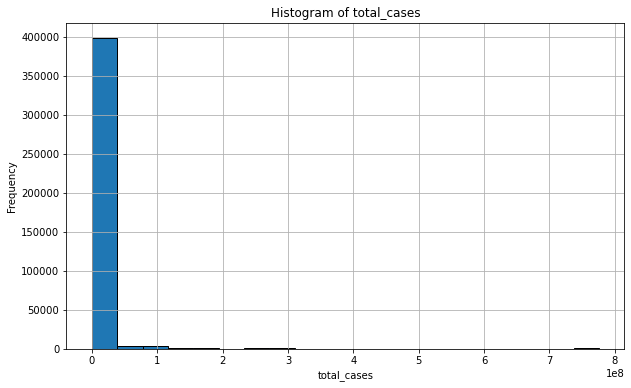

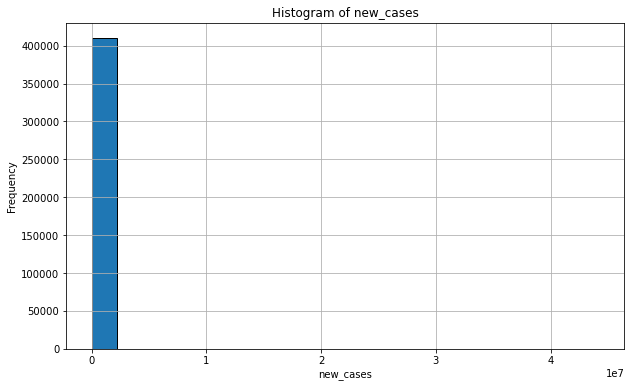

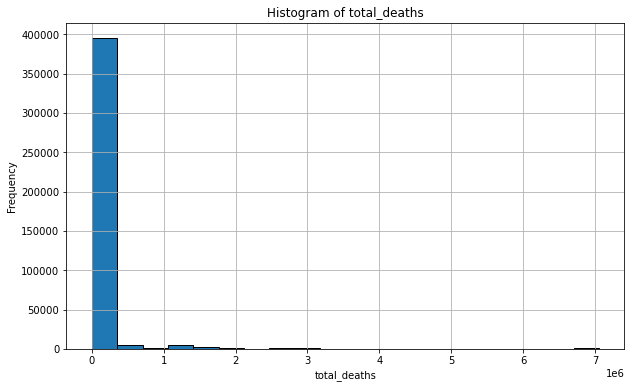

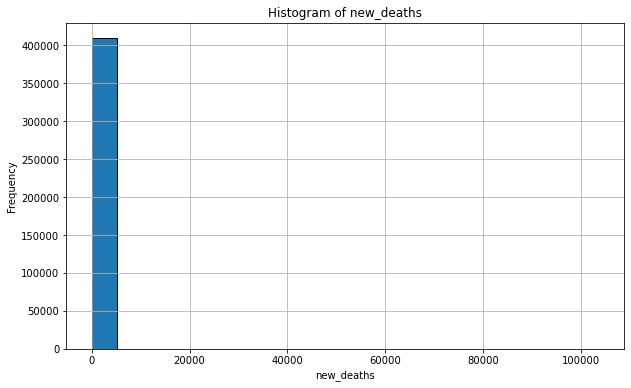

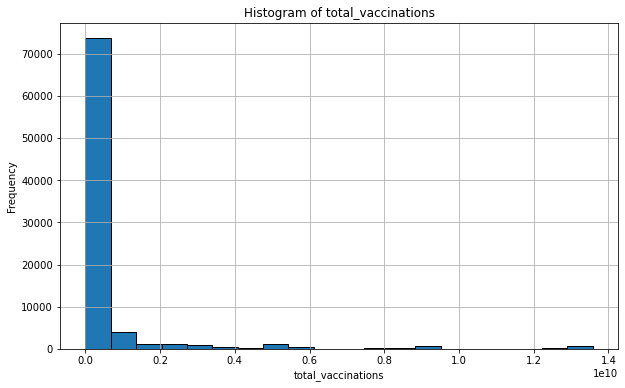

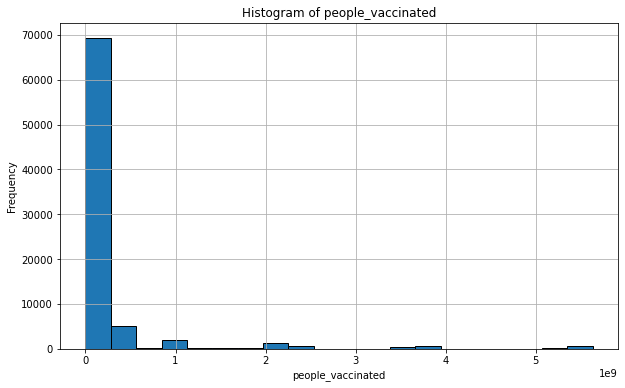

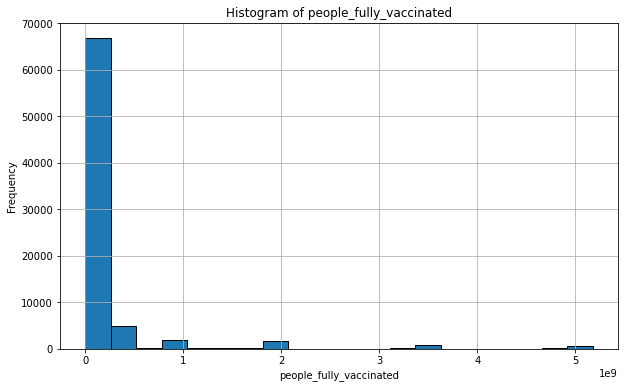

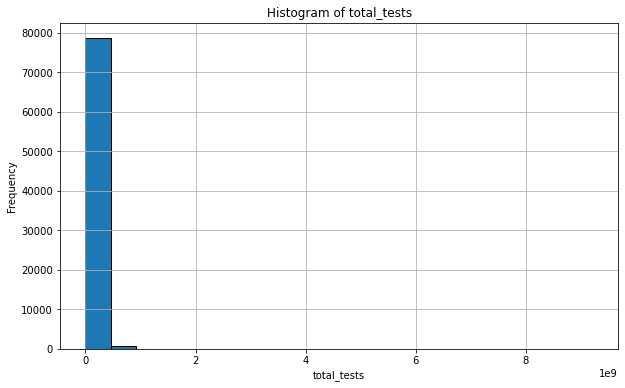

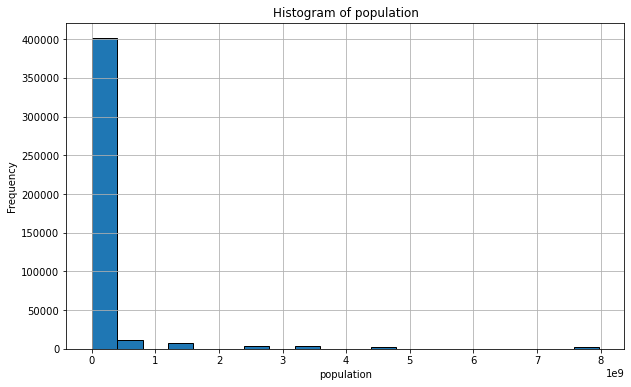

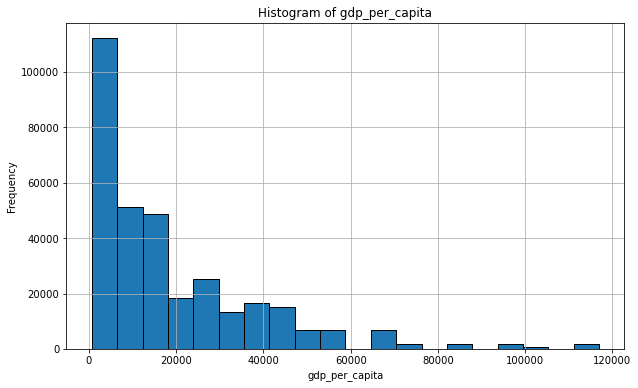

In [24]:
# Generar histogramas para cada columna seleccionada
for column in selected_columns:
    plot_histogram(df_pandas, column)

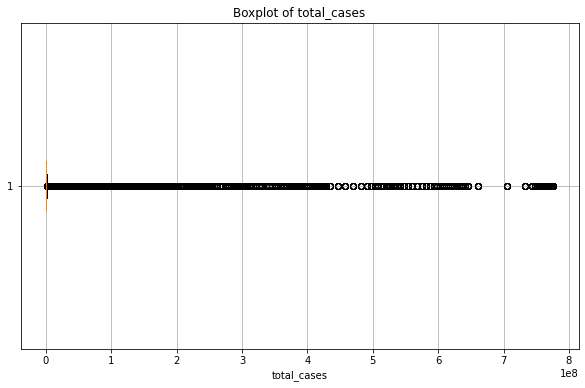

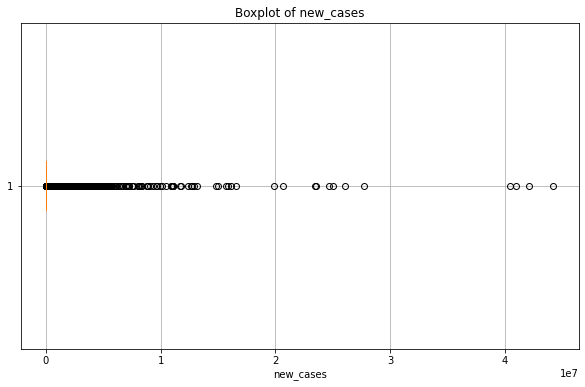

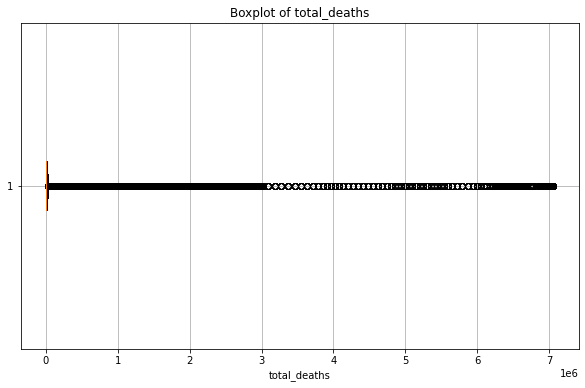

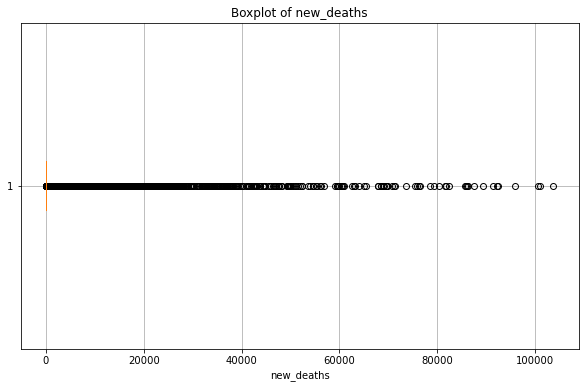

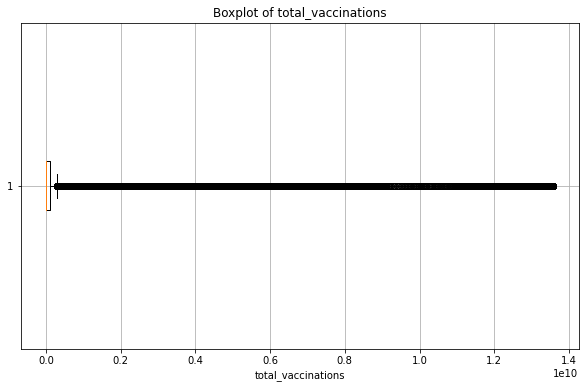

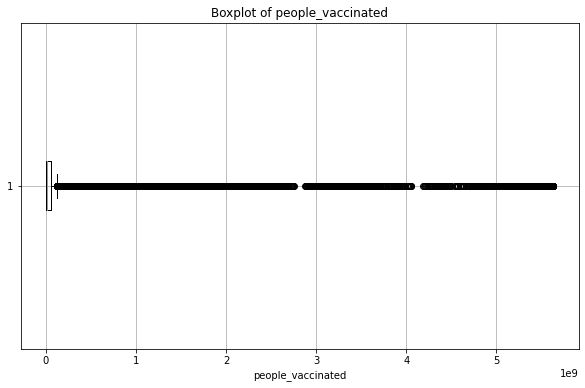

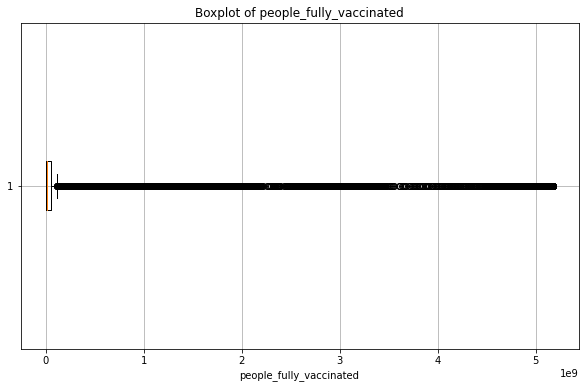

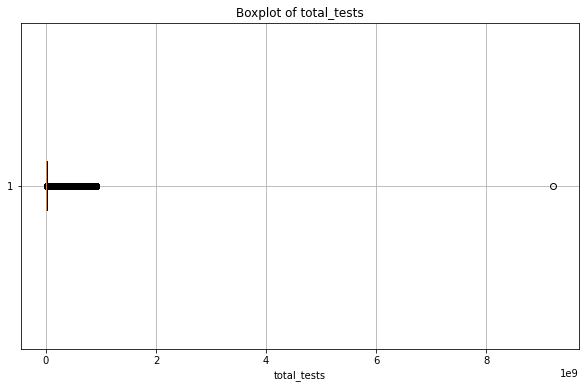

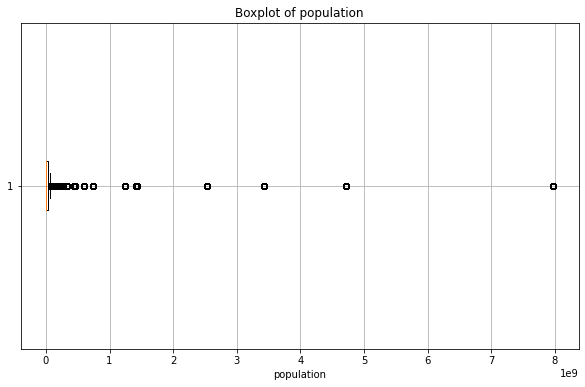

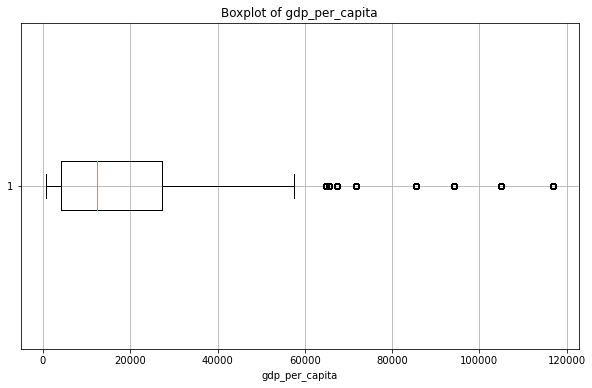

In [23]:
# Generar boxplots para cada columna seleccionada
for column in selected_columns:
    plot_boxplot(df_pandas, column)